In [ ]:
import cv2                                         #importing the opencv library 
import matplotlib.pyplot as plt                    #importing the matplotlib library
import tensorflow as tf                            #importing the tensorflow library
import os                                          
from numpy import array                            #importing the numpy array
from keras.models import Sequential                #importing the sequential model
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam,SGD
import keras 
from keras.optimizers import *
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Activation

In [ ]:
from keras.datasets import cifar10    

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train[0:5000]
x_test=x_test[0:800]

In [ ]:
dataset=[]
for image in x_train:
    h,w,c=image.shape
    low_res=cv2.resize(image,(w//4,h//4),interpolation =cv2.INTER_LINEAR)
    low_res=cv2.resize(image,(w,h),interpolation =cv2.INTER_LINEAR)
    dataset.append(low_res)
x_train1=np.array(dataset,dtype=float)
print(y_train1.shape)

(5000, 32, 32, 3)


In [ ]:
model = Sequential()    
model.add(Conv2D(32,(5,5),activation='relu',kernel_initializer='glorot_uniform',padding='same', use_bias=True,input_shape=(None,None,3)))  
model.add(Conv2D(32, (3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same', use_bias=True))
model.add(Conv2D(32, (3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same', use_bias=True))
model.add(Conv2D(32, (3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same', use_bias=True))
model.add(Conv2D(3, (5,5),activation='relu',kernel_initializer='glorot_uniform',padding='same', use_bias=True))
model.build()

In [ ]:
adam= Adam(lr=3e-4) # intializing the stochastic gradient descent and learning rate as fast 
model.compile(                      # compiling my model with a loss of mean square error
    optimizer=adam,
    loss='mse',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train1, x_train,                       # training my model with input as patches and output as central pixels
          batch_size=15,epochs=10)   

Epoch 1/10
334/334 [==============================] - 27s 80ms/step - loss: 552.0112 - accuracy: 0.6650
Epoch 2/10
334/334 [==============================] - 29s 88ms/step - loss: 66.7239 - accuracy: 0.8057
Epoch 3/10
334/334 [==============================] - 27s 80ms/step - loss: 42.7475 - accuracy: 0.8333
Epoch 4/10
334/334 [==============================] - 28s 84ms/step - loss: 33.7929 - accuracy: 0.8416
Epoch 5/10
334/334 [==============================] - 30s 89ms/step - loss: 28.9405 - accuracy: 0.8477
Epoch 6/10
334/334 [==============================] - 27s 80ms/step - loss: 22.3912 - accuracy: 0.8614
Epoch 7/10
334/334 [==============================] - 29s 85ms/step - loss: 19.3590 - accuracy: 0.8629
Epoch 8/10
334/334 [==============================] - 28s 83ms/step - loss: 17.0298 - accuracy: 0.8710
Epoch 9/10
334/334 [==============================] - 29s 86ms/step - loss: 13.3240 - accuracy: 0.8762
Epoch 10/10
334/334 [==============================] - 30s 91ms/step - l

In [ ]:
score = model.evaluate(x_train1, x_train, batch_size=32)

157/157 [==============================] - 5s 30ms/step - loss: 10.8402 - accuracy: 0.8941


In [ ]:
score

[10.8402099609375, 0.8941287398338318]

No handles with labels found to put in legend.


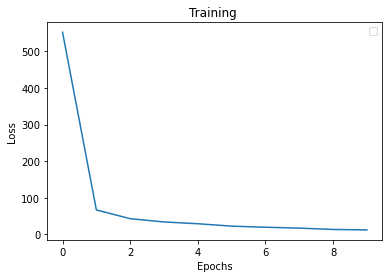

In [ ]:

plt.plot(history.history['loss'])
plt.title('Training ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

No handles with labels found to put in legend.


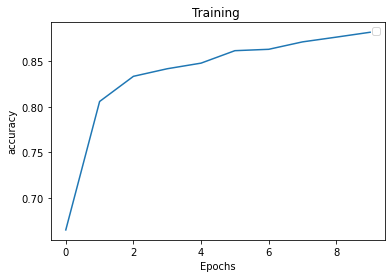

In [ ]:

plt.plot(history.history['accuracy'])
plt.title('Training ')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

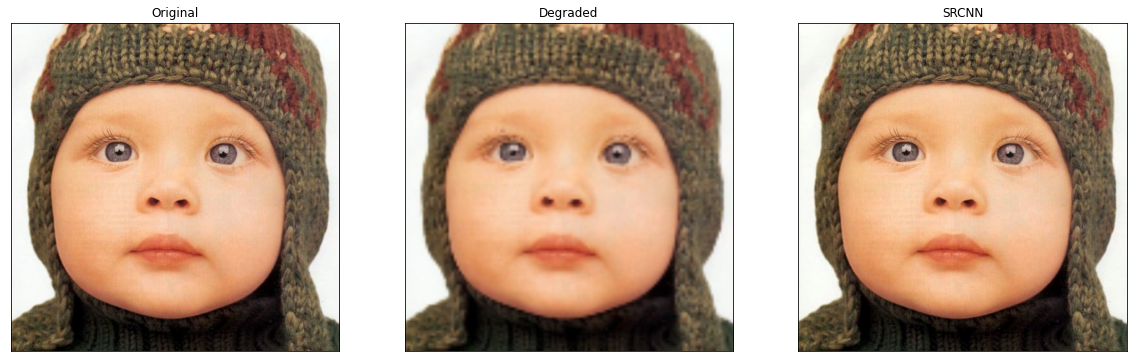

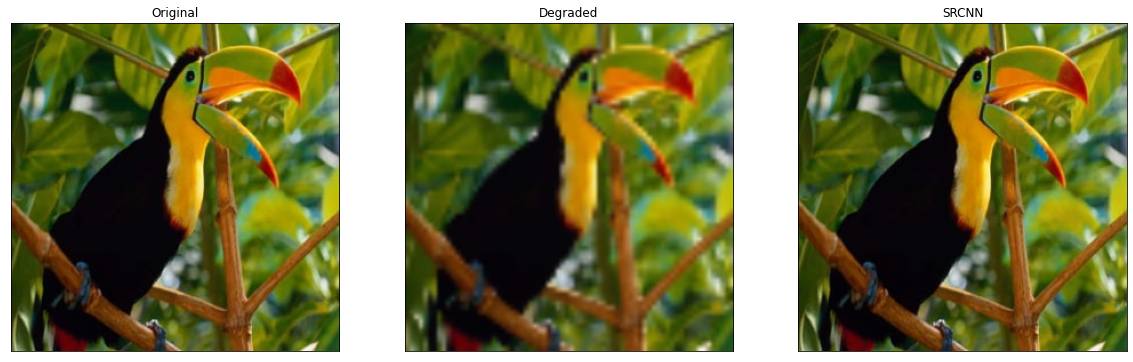

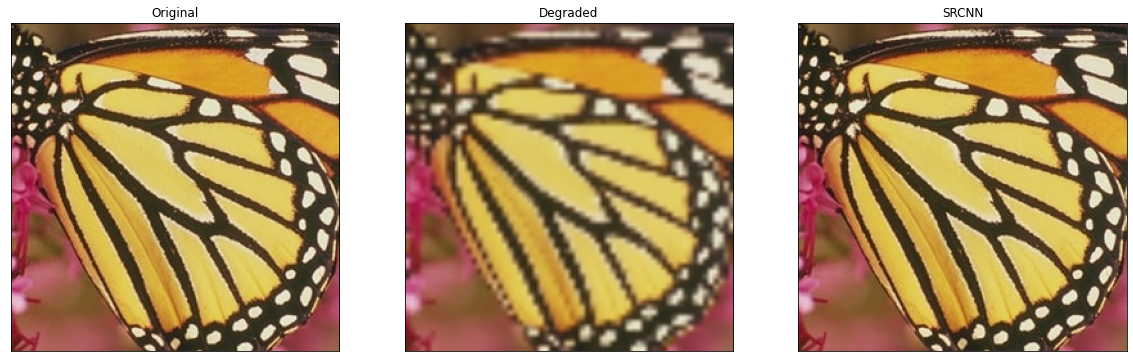

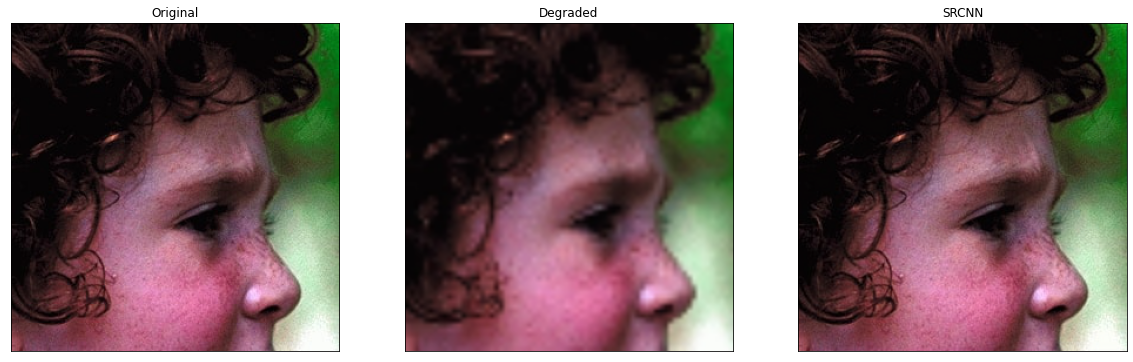

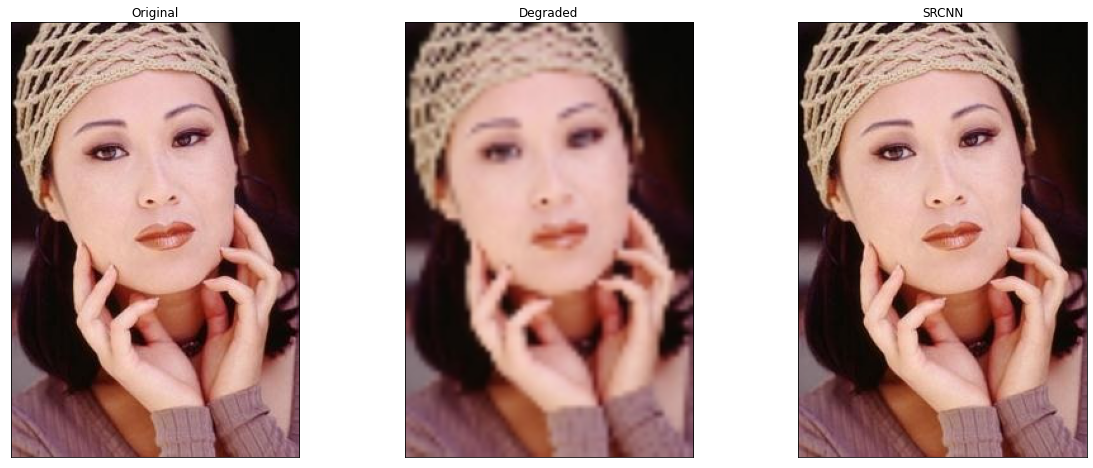

In [ ]:
test_image_path=r'C:\Users\Ravi Kiran\Documents\test'

for filename in os.listdir(test_image_path):
    img=plt.imread(os.path.join(test_image_path,filename))  
    h,w,c= img.shape    
    
    near_img = cv2.resize(img, (w//4,h//4),interpolation =cv2.INTER_LINEAR)  
    l_img = cv2.resize(near_img, (w, h),interpolation =cv2.INTER_LINEAR)
    
    my_image=tf.reshape(img,[-1,l_img.shape[0],l_img.shape[1],3]) 
    y=model.predict(my_image,batch_size=20)
    y=np.reshape(y,(h,w,3))
    y[y[:] > 255] = 255
    y[y[:] < 0] = 0
    y=y.astype(np.uint8)
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    axs[0].imshow(img)
    axs[0].set_title('Original')
    axs[1].imshow(l_img)
    axs[1].set_title('Degraded')
    axs[2].imshow(y)
    axs[2].set_title('SRCNN')

    # remove the x and y ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])